In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [10]:
df.shape

(49068, 10)

In [12]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

In [14]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [16]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [18]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [20]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [22]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [36]:
# Data cleaning 
#1 missing numbers 
df.Recovered.isnull().sum()

0

In [26]:
df["Province/State"].isnull().sum()

34404

In [32]:
df["WHO Region"].isnull().sum()

0

In [34]:
df.columns.isnull().sum()

0

In [42]:
#2 Duplicated

df.duplicated("Country/Region").sum()

48881

In [46]:
df.Confirmed.max()

4290259

In [48]:
df.Confirmed.sum()

828508482

In [52]:
df.Confirmed.mean()

16884.90425531915

In [54]:
df.Confirmed.describe()

count    4.906800e+04
mean     1.688490e+04
std      1.273002e+05
min      0.000000e+00
25%      4.000000e+00
50%      1.680000e+02
75%      1.518250e+03
max      4.290259e+06
Name: Confirmed, dtype: float64

In [56]:
df["WHO Region"].describe()

count      49068
unique         6
top       Europe
freq       15040
Name: WHO Region, dtype: object

In [79]:
df["Deaths_Recovered_Total"] = df["Deaths"] + df["Recovered"]

In [81]:
invalid_rows = df[df["Confirmed"] >= df["Deaths_Recovered_Total"]]
print("Invalid_rows :", invalid_rows.shape[0])

Invalid_rows : 49050


<Axes: >

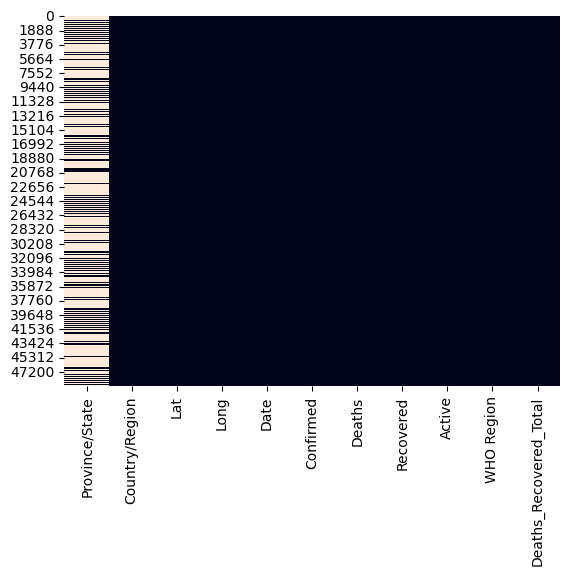

In [85]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)

In [95]:
df["Date"] = pd.to_datetime(df["Date"])

In [97]:
df["Date"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [99]:
df.Date.duplicated().sum()

48880

In [101]:
df["Date"].value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [103]:
df["Date"].unique()

<DatetimeArray>
['2020-01-22 00:00:00', '2020-01-23 00:00:00', '2020-01-24 00:00:00',
 '2020-01-25 00:00:00', '2020-01-26 00:00:00', '2020-01-27 00:00:00',
 '2020-01-28 00:00:00', '2020-01-29 00:00:00', '2020-01-30 00:00:00',
 '2020-01-31 00:00:00',
 ...
 '2020-07-18 00:00:00', '2020-07-19 00:00:00', '2020-07-20 00:00:00',
 '2020-07-21 00:00:00', '2020-07-22 00:00:00', '2020-07-23 00:00:00',
 '2020-07-24 00:00:00', '2020-07-25 00:00:00', '2020-07-26 00:00:00',
 '2020-07-27 00:00:00']
Length: 188, dtype: datetime64[ns]

In [111]:
df["Country/Region"]

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
49063    Sao Tome and Principe
49064                    Yemen
49065                  Comoros
49066               Tajikistan
49067                  Lesotho
Name: Country/Region, Length: 49068, dtype: object

<Axes: xlabel='Deaths_Recovered_Total', ylabel='Count'>

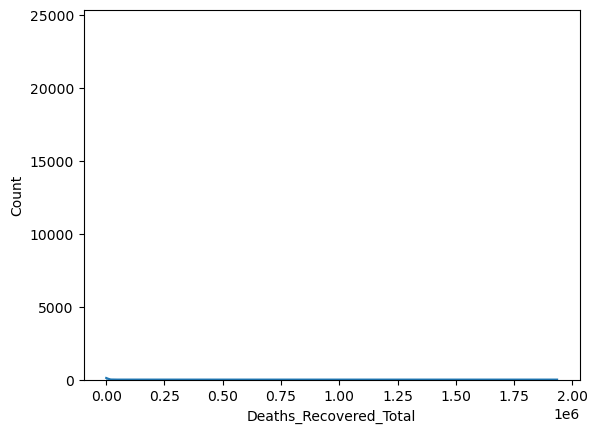

In [117]:
sns.histplot(df["Deaths_Recovered_Total"], kde=True)

<Axes: xlabel='Country/Region', ylabel='Count'>

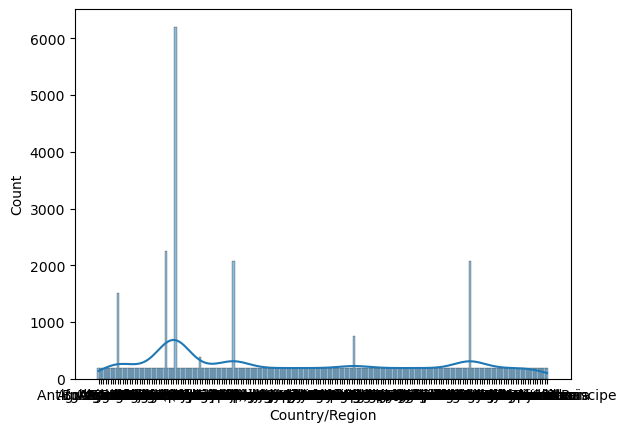

In [118]:
sns.histplot(df["Country/Region"], kde=True)

<Axes: >

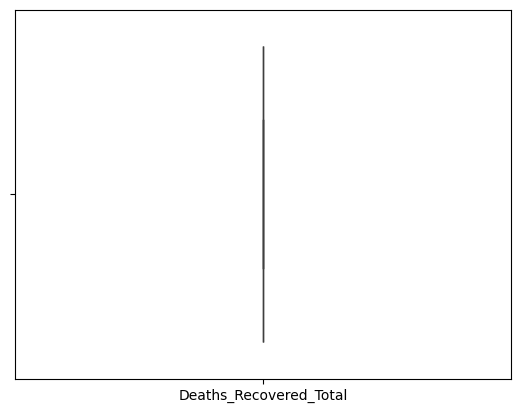

In [121]:
sns.boxplot(x = ["Deaths_Recovered_Total"])

<Axes: >

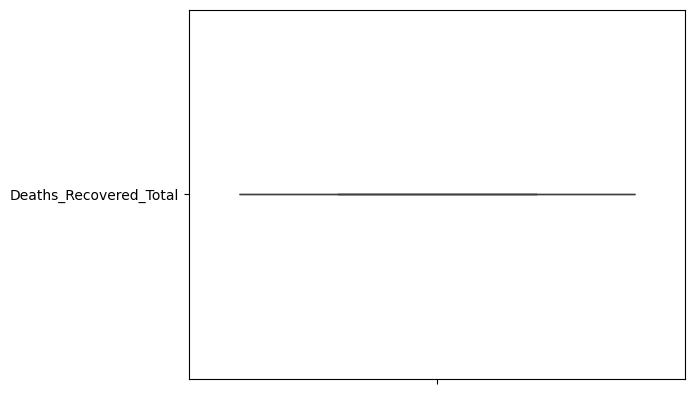

In [123]:
sns.boxplot(y = ["Deaths_Recovered_Total"])

<Axes: xlabel='Country/Region'>

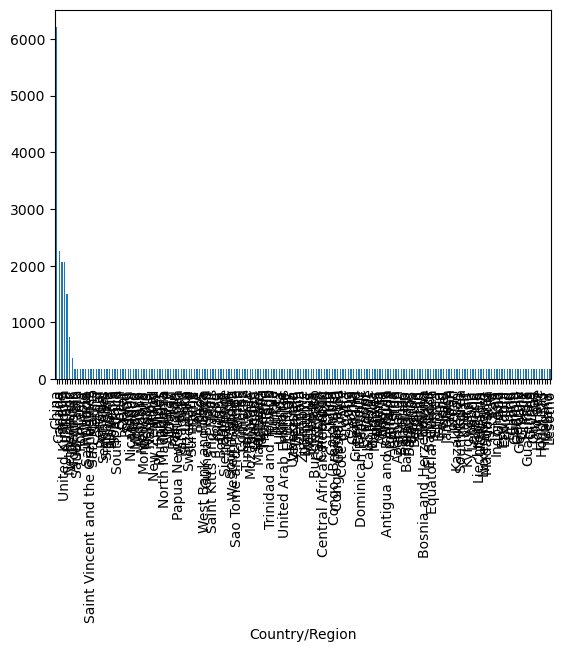

In [125]:
df["Country/Region"].value_counts().plot(kind='bar')

<Axes: xlabel='Province/State'>

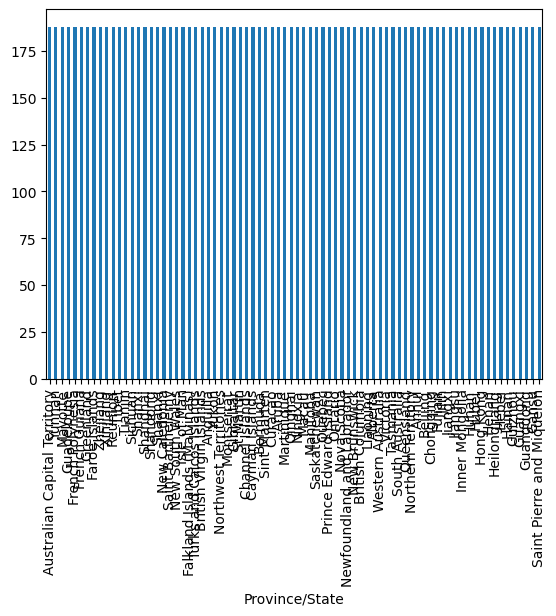

In [127]:
df["Province/State"].value_counts().plot(kind="bar")

In [129]:
df["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [131]:
df["Province/State"].value_counts()

Province/State
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: count, Length: 78, dtype: int64

<Axes: xlabel='WHO Region', ylabel='Recovered'>

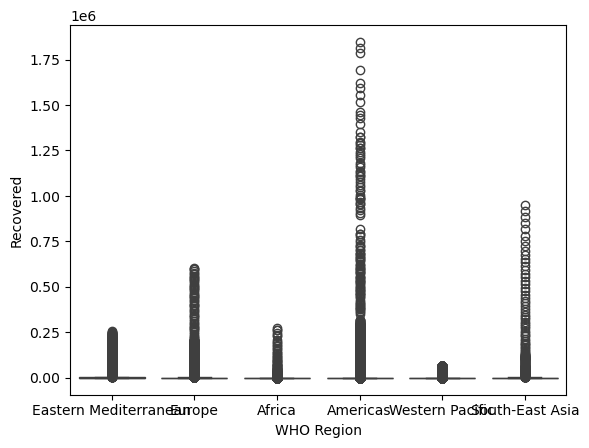

In [133]:
sns.boxplot(x=df["WHO Region"], y=df["Recovered"], data=df)

<Axes: xlabel='WHO Region', ylabel='Deaths'>

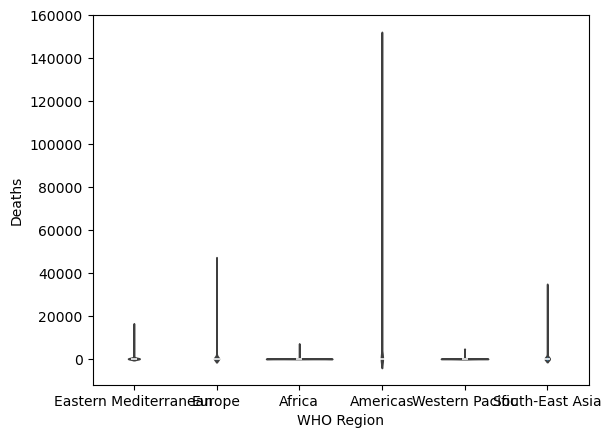

In [137]:
sns.violinplot(x = df["WHO Region"], y = df["Deaths"], data= df)

In [141]:
df.drop_duplicates(inplace=True)

In [143]:
df.duplicated().sum()

0

<Axes: xlabel='Deaths', ylabel='WHO Region'>

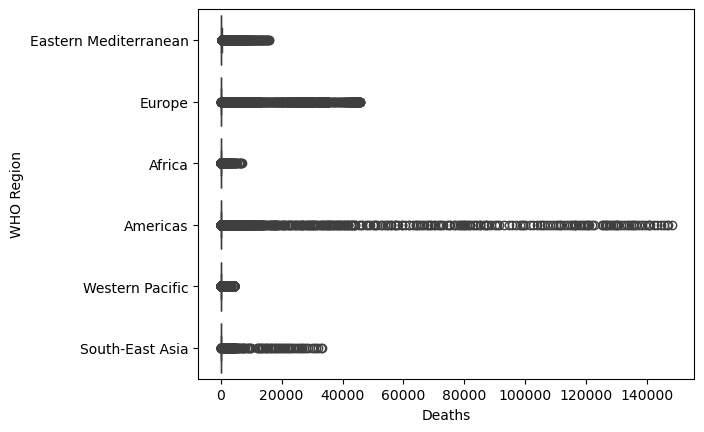

In [147]:
sns.boxplot(x=df["Deaths"], y=df["WHO Region"])

In [149]:
df.shape

(49068, 11)

In [153]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region',
       'Deaths_Recovered_Total'],
      dtype='object')

In [155]:
grouped_df = df.groupby(["Country/Region", "Date"]).agg({
    "Confirmed" :"sum",
    "Deaths" : "sum",
    "Recovered" : "sum",
    "Active" : "sum"
}).reset_index()

In [157]:
grouped_df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510,1586
35152,Zimbabwe,2020-07-24,2296,32,514,1750
35153,Zimbabwe,2020-07-25,2434,34,518,1882
35154,Zimbabwe,2020-07-26,2512,34,518,1960


In [159]:
grouped_df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0


In [161]:
grouped_df.describe()

,Date,Confirmed,Deaths,Recovered,Active
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04


<Axes: title={'center': 'Top 10 Countries by Confirmed cases'}, xlabel='Country/Region'>

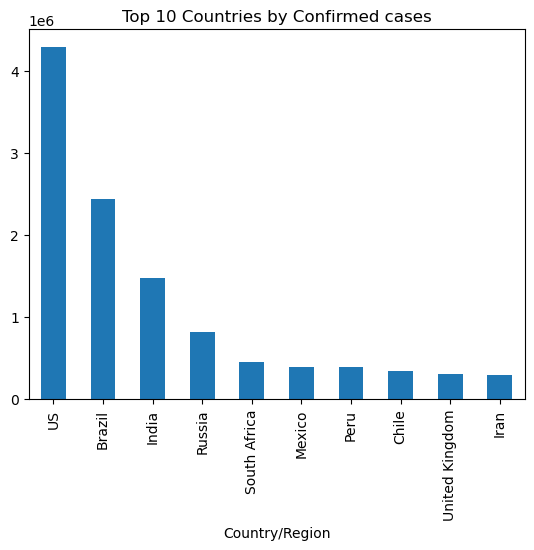

In [197]:
top_confirmed = grouped_df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(10)
top_confirmed.plot(kind='bar', title="Top 10 Countries by Confirmed cases")

<Axes: title={'center': 'India data by date'}, xlabel='Date'>

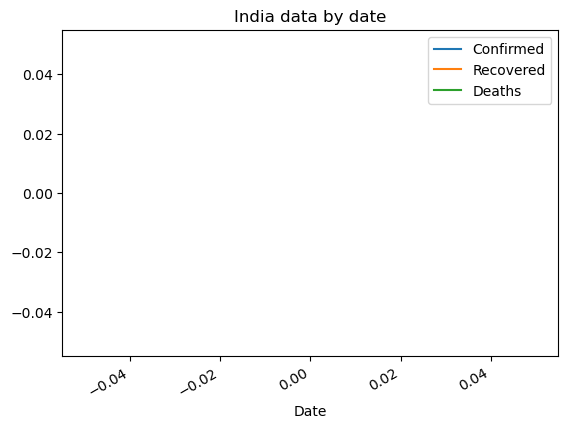

In [177]:
India_data = grouped_df[grouped_df["Country/Region"] == "india"]
India_data.plot(x="Date", y=["Confirmed","Recovered","Deaths"], title="India data by date")

In [179]:
print(India_data)

Empty DataFrame
Columns: [Country/Region, Date, Confirmed, Deaths, Recovered, Active]
Index: []


<Axes: title={'center': 'China COVID-19 Trends'}, xlabel='Date'>

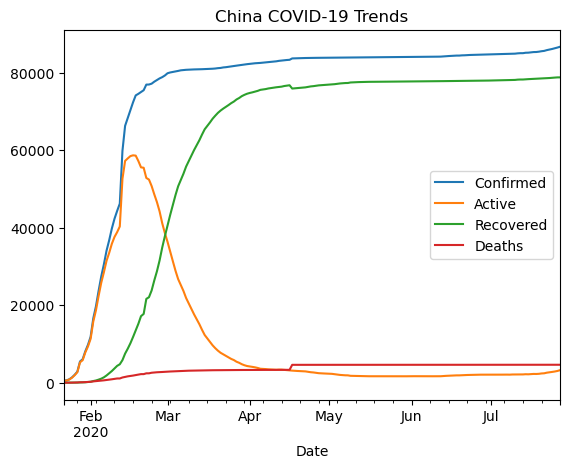

In [181]:
china_data = grouped_df[grouped_df["Country/Region"] == "China"]
china_data.plot(x="Date", y=["Confirmed", "Active", "Recovered", "Deaths"], title="China COVID-19 Trends")

<Axes: title={'center': ' Particular [22-01-2020] Trends by Country'}, xlabel='Country/Region'>

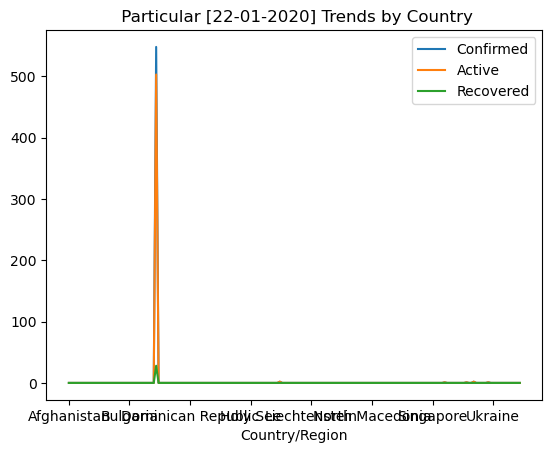

In [193]:
Date_data = grouped_df[grouped_df["Date"] == "22-01-2020" ]
Date_data.plot(x="Country/Region", y = ["Confirmed", "Active", "Recovered"], title=" Particular [22-01-2020] Trends by Country")

<Axes: title={'center': ' Particular [22-01-2020] Trends by Country'}, xlabel='Country/Region'>

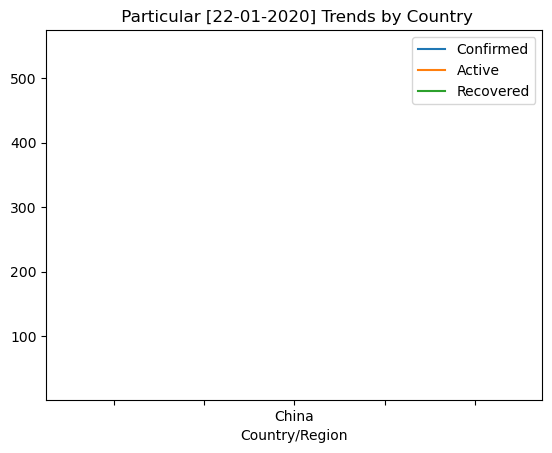

In [203]:
Date_data = grouped_df[
(grouped_df["Date"] == "22-01-2020") & 
(grouped_df["Country/Region"] == "China")
]
Date_data.plot(x="Country/Region", y = ["Confirmed", "Active", "Recovered"], title=" Particular [22-01-2020] Trends by Country")

In [205]:
#Time-Based Trends



top_countries = grouped_df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(5).index
print(top_countries)

Index(['US', 'Brazil', 'India', 'Russia', 'South Africa'], dtype='object', name='Country/Region')


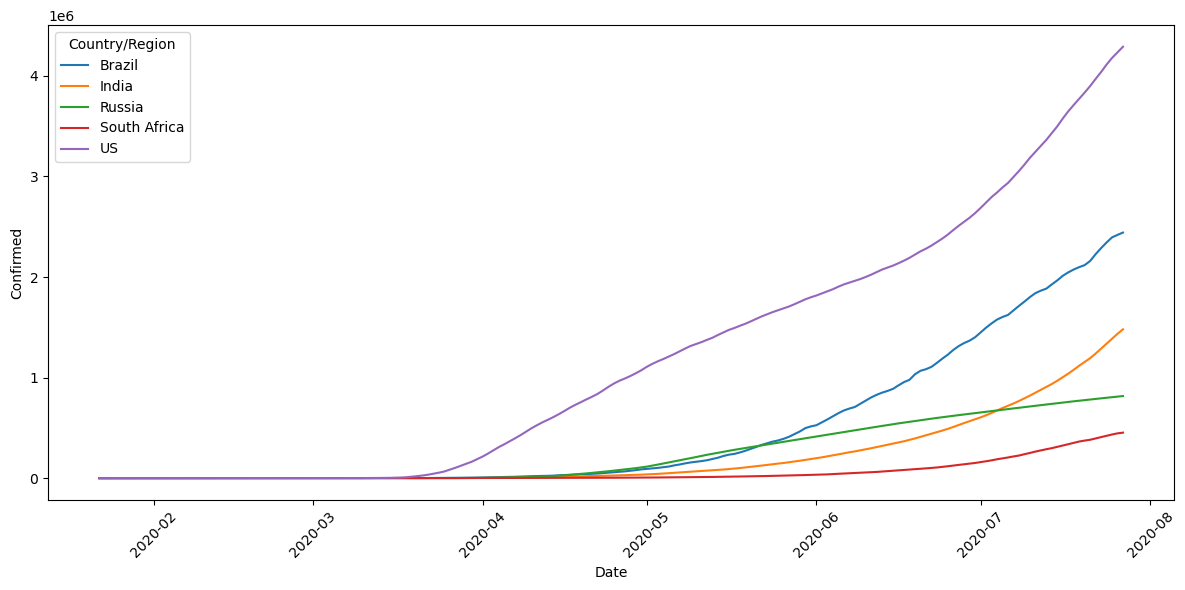

In [207]:

top_countries = grouped_df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(5).index
top_data = grouped_df[grouped_df["Country/Region"].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_data, x="Date", y ="Confirmed", hue="Country/Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [211]:
df.shape

(49068, 11)

In [213]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region',
       'Deaths_Recovered_Total'],
      dtype='object')

In [215]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Deaths_Recovered_Total
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,8.799893e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,0.000000e+00
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,5.300000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,8.080000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,1.934259e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,5.975822e+04
